In [120]:
import numpy as np

# Constellation M-QAM Mapper

#### Data input generation

In [121]:
bitstream = np.random.randint(0,2,128)
bitstream = np.array(list(map(np.float32,bitstream)))

#### Block Parameters

In [122]:
M = 16 # Number of Symbols (please insert only n^2 values, for n > 1)
Ep = 16 # Average Symbol Energy

#### Block Function

In [123]:
def QAM_Mapper_Caio(bitstream,M,Ep):
    N = int(np.sqrt(M)/2)
    BNum = int(np.log2(M))                                # Number of Bits
    oneDim = np.arange(-1 - 2*(N-1) , 1 + 2*(N-1) + 2, 2) # Symbol odd spacement (...-3,-1,1,3...)

    ConstPts = np.zeros((M),dtype=np.complex64)           # Constellation points
    bitArray = np.zeros((M))                              # Bit sequences of all possible symbols
    OutArray = np.zeros((int(len(bitstream))),dtype=np.complex64)
    SEnergy = 0

    for i in range(2*N):
        for j in range(2*N):
            ConstPts[int(j+i*(2*N))] = oneDim[i]+1j*oneDim[j]
            SEnergy = SEnergy + oneDim[i]**2+oneDim[j]**2
    SEnergy = SEnergy/M
    ConstPts = Ep*ConstPts/SEnergy                         # Energy-adjusted Constellation points

    seq = np.arange(M)
    bitArray = [np.binary_repr(x,BNum) for x in seq]

    for i in range(int(len(bitstream)/BNum)):
        for j in range(M):
            if(''.join(list(map(str,(np.array(list(map(int,bitstream[i*BNum : (i+1)*BNum]))))))) == bitArray[j]):
                OutArray[i*BNum] = np.pad(ConstPts[j],(0,BNum-1))
                break
    return OutArray

#### Testing

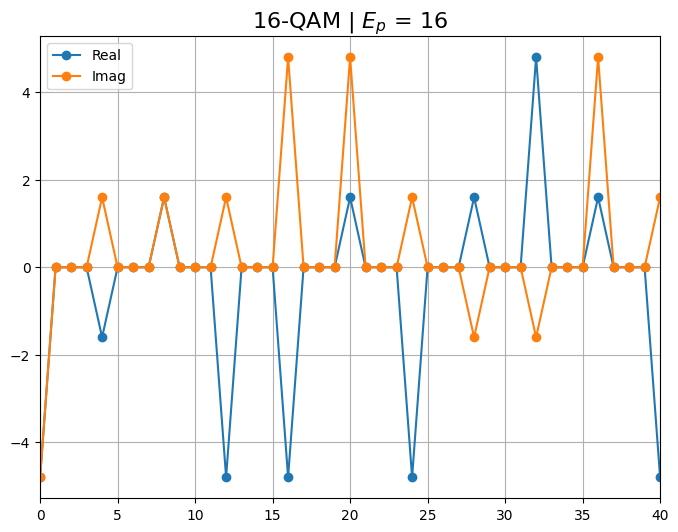

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(np.real(QAM_Mapper_Caio(bitstream,M,Ep)),'-o',label='Real')
plt.plot(np.imag(QAM_Mapper_Caio(bitstream,M,Ep)),'-o',label='Imag')
plt.grid()
plt.title(f'{M}-QAM | $E_p$ = {Ep}',fontsize=16)
plt.xlim(0,40)
plt.legend()